In [1]:
#This project is about the Vinho verde portugese wine. 
#The data available for this project is physicochemical(input) and sensory variables. 
#We are going to use the classification task to know which physicochemical variables helps to make a quality wine. 
#Using 7 and above as good(1).6 and below as bad(0)#


In [2]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #like way of plotting
import seaborn as sns

In [3]:
# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [4]:
#read csv file
df=pd.read_csv('winequality-red1.csv')

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.columns
#this shows the input and output of the dataset

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
df.shape
#This shows the rows and columns(showing the dimension of the data sets)

(1599, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


In [11]:
df.isnull().sum()
#helps to give a total summary of checking the missing values
#There are no missing values in our data.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.dtypes
# All input variables are in decimals while output(quality) is in float

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
df.iloc[500,:]
#random checking of the rows

fixed acidity            7.8000
volatile acidity         0.5200
citric acid              0.2500
residual sugar           1.9000
chlorides                0.0810
free sulfur dioxide     14.0000
total sulfur dioxide    38.0000
density                  0.9984
pH                       3.4300
sulphates                0.6500
alcohol                  9.0000
quality                  6.0000
Name: 500, dtype: float64

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df_visualization_continuous=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']].copy()

In [16]:
df_visualization_continuous.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

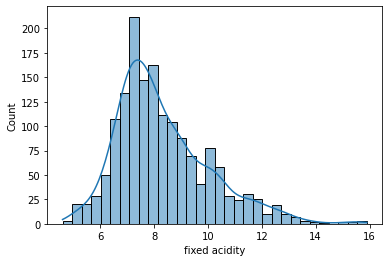

In [17]:
sns.histplot(df_visualization_continuous['fixed acidity'],kde=True)

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

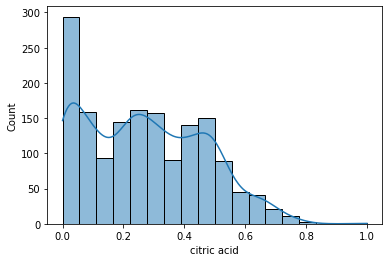

In [18]:
sns.histplot(df_visualization_continuous['citric acid'],kde=True)

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

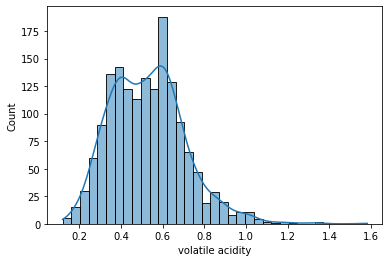

In [19]:
sns.histplot(df_visualization_continuous['volatile acidity'],kde=True)

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

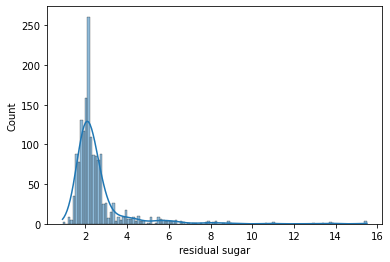

In [20]:
sns.histplot(df_visualization_continuous['residual sugar'],kde=True)

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

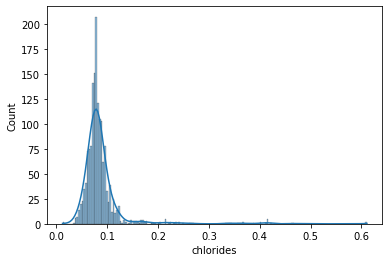

In [21]:
sns.histplot(df_visualization_continuous['chlorides'],kde=True)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

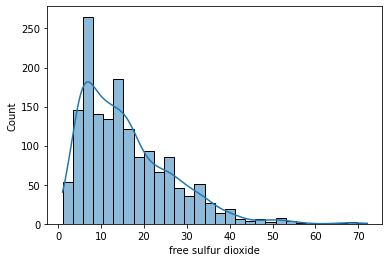

In [22]:
sns.histplot(df_visualization_continuous['free sulfur dioxide'],kde=True)

<AxesSubplot:xlabel='density', ylabel='Count'>

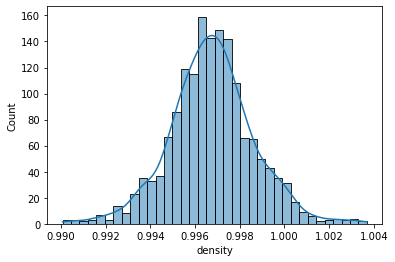

In [23]:
sns.histplot(df_visualization_continuous['density'],kde=True)

<AxesSubplot:xlabel='quality', ylabel='Count'>

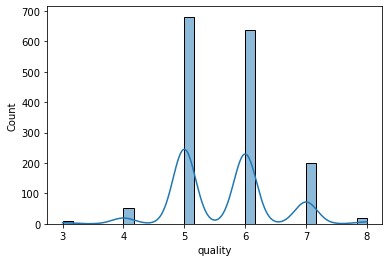

In [24]:
sns.histplot(df_visualization_continuous['quality'],kde=True)

<AxesSubplot:xlabel='pH', ylabel='Count'>

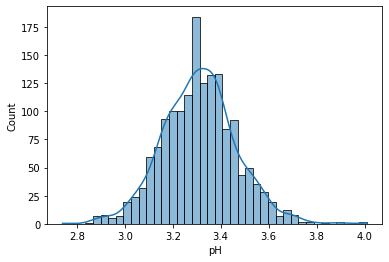

In [25]:
sns.histplot(df_visualization_continuous['pH'],kde=True)

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

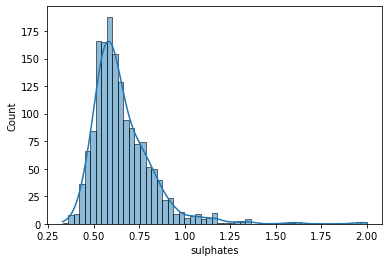

In [26]:
sns.histplot(df_visualization_continuous['sulphates'],kde=True)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

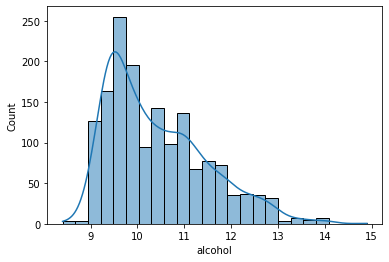

In [27]:
sns.histplot(df_visualization_continuous['alcohol'],kde=True)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

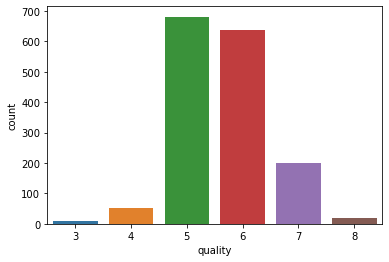

In [28]:
sns.countplot(df_visualization_continuous['quality'])

In [29]:
df_visualization_continuous.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

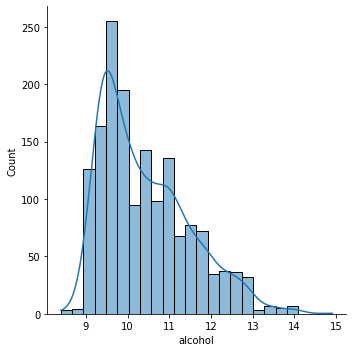

In [30]:
sns.displot(df_visualization_continuous['alcohol'],kde=True)

In [31]:
#visualization of data

In [32]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

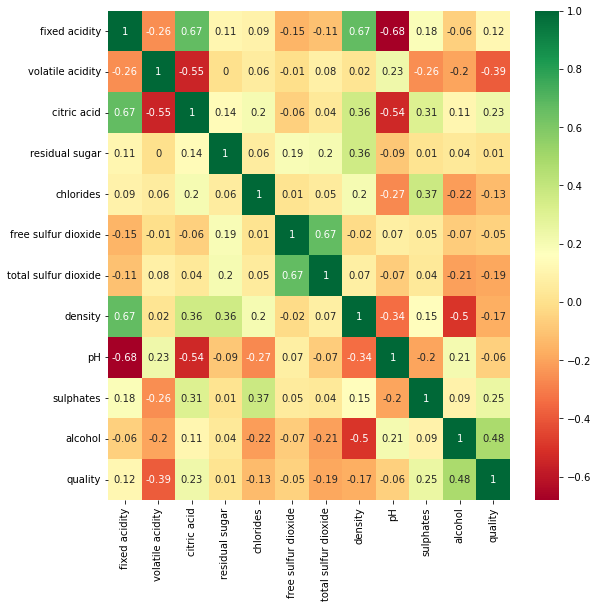

In [33]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(9,9))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="RdYlGn")

In [34]:
#using the correlation matrix,we can see that 'fixed acidity',
#'citric acid','residual sugar','sulphates','alcohol'
# are positivelt correlated with the quality of the wine

In [35]:
x=df.iloc[:,0:11]
y=df.iloc[:,11]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [36]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [53]:
#dividing quality of wine into groups
# if the quality of wine is 7 and above,wine= Good(1)
#if the quality of wine is 1-6,wine = not good(0)
def create_classes(y):
    if y <= 7:
        y = 0
    else:
        y = 1
        
   

In [54]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [55]:
#splitting the data set into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, 
random_state=0)

In [56]:
#Using logistic regression
logre = LogisticRegression(max_iter=1000)
logre.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred = logre.predict(x_test)
print('Prediction:', y_pred)

Prediction: [6 5 7 5 6 5 5 6 5 5 5 5 6 5 6 6 7 6 6 5 6 5 6 7 5 5 5 6 5 7 6 6 6 5 6 6 5
 6 7 6 5 6 7 7 6 5 5 6 5 6 5 5 6 6 6 5 5 5 7 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 5 6 5 5 5 6 6 5 6 6 6 5 7 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 5 5 6 6 5 5 6 7 5 5 6 6 7 5 6 5 6 5 6 5 5 5 6 6 6 7
 6 5 6 6 5 6 6 5 5 5 6 6 6 6 6 5 6 5 6 7 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 7
 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 7 6 5 6 5 5 6 5 6 6 6 6 5 5 6
 6 6 5 6 7 6 5 5 5 6 5 6 6 6 6 7 7 6 5 5 5 5 6 5 5 5 5 7 5 5 5 5 6 5 5 5 5
 5 5 7 5 6 5 5 5 5 6 7 6 6 5 6 6 6 6 5 7 6 5 7 6 6 6 5 5 5 6 6 6 5 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 6 6 5 5 5 7 6 6 5 6 5 6 6 6 5 5 7 5 5 5 7 5 5
 6 5 6 6 6 5 5 5 5 5 6 6 5 5 5 5 7 6 6 5 6 7 5 6 6 6 6 5 7 5 6 5 5 6 7 5 5
 6 6 5 6 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 5 7 5 5 7 5 6 5 6 6 5 5 5 5 5 6 5 6
 6 5 6 6 5 5 6 6 5 6 5 5 6 6 6 6 6 5 6 6 6 5 5 5 6 5 6 6 7 6 7 5 5 6 5 6 5
 6 6 6 7 5 6 6 5 6 7 6 5 6 5 6 5 5 7 5 5 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5 7
 7 5 6 6 7 6 

In [58]:
#checking the accuracy of the model
print('Our Accuracy is %.3f' % logre.score(x_test, y_test))

Our Accuracy is 0.612


In [60]:
#evaluating model performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.06      0.11        17
           5       0.67      0.75      0.71       231
           6       0.59      0.59      0.59       226
           7       0.36      0.34      0.35        50
           8       0.00      0.00      0.00         5

    accuracy                           0.61       533
   macro avg       0.44      0.29      0.29       533
weighted avg       0.61      0.61      0.60       533



/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Training the data set with Guassian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [62]:
#checking the accuracy of the model
print('Our Accuracy is %.3f' % gnb.score(x_test, y_test))

Our Accuracy is 0.553


In [64]:
#Neural Network
#Training the data set with MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation="logistic", random_state=0, max_iter = 2000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=0)

In [65]:
#Testing the model
y_pred = mlp.predict(x_test)
print('Prediction:', y_pred)

Prediction: [6 5 7 5 6 5 5 6 5 5 5 5 6 5 6 7 7 6 6 5 6 5 6 7 5 5 5 6 5 7 6 6 6 5 6 6 5
 6 7 6 5 6 7 7 6 5 5 6 5 6 5 5 6 6 6 5 5 5 7 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 5 6 5 5 5 6 5 5 6 6 6 5 7 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 7 6 5 6 5 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 5 5 6 6 5 5 6 7 5 5 6 6 7 5 6 5 6 5 6 5 5 5 6 6 6 7
 6 5 6 6 5 6 6 5 5 5 6 6 6 6 6 5 6 5 6 7 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 7
 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 7 6 5 6 5 5 6 5 6 6 6 6 5 5 6
 6 6 5 6 7 6 5 5 5 6 5 6 6 6 6 7 7 6 5 5 5 5 6 5 5 5 5 7 5 5 5 5 6 5 5 5 5
 5 5 7 5 6 5 5 5 5 6 7 5 6 5 6 6 6 6 5 7 6 5 7 6 6 6 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 6 6 5 5 5 7 6 6 5 6 5 6 6 6 5 5 7 5 5 5 7 5 5
 6 5 6 6 6 5 5 5 5 5 6 6 5 5 5 5 7 6 6 5 6 7 5 6 6 6 6 5 7 5 6 5 5 6 7 5 5
 6 6 5 6 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 5 7 5 5 7 5 6 5 6 6 5 5 5 5 5 6 5 6
 6 5 6 6 5 5 6 6 5 6 5 5 6 6 6 6 6 5 6 6 6 5 5 5 6 5 7 6 7 6 7 5 5 6 5 6 5
 6 6 6 7 5 6 6 5 6 7 6 5 6 5 6 5 5 7 5 5 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5 7
 7 5 6 6 7 6 

In [66]:
#Accuracy of the model
print('Our Accuracy is %.3f' % mlp.score(x_test, y_test))

Our Accuracy is 0.604


In [ ]:
#The accuracy score  using logistic regression is 61.2%
#The accuracy score  using guassian naives bayes is 55.3%
#The accuracy score  using neural network is 60.4%